#Proyecto final

##Imports.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#Bases de datos.


1. MAGIC Gamma Telescope. (Clasificacion)
2. Concrete Compressive Strength. (Regresion lineal)

##MAGIC Gamma Telescope

The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

Typically, the image of a shower after some pre-processing is an elongated cluster. Its long axis is oriented towards the camera center if the shower axis is parallel to the telescope's optical axis, i.e. if the telescope axis is directed towards a point source. A principal component analysis is performed in the camera plane, which results in a correlation axis and defines an ellipse. If the depositions were distributed as a bivariate Gaussian, this would be an equidensity ellipse. The characteristic parameters of this ellipse (often called Hillas parameters) are among the image parameters that can be used for discrimination. The energy depositions are typically asymmetric along the major axis, and this asymmetry can also be used in discrimination. There are, in addition, further discriminating characteristics, like the extent of the cluster in the image plane, or the total sum of depositions.

##Concrete Compressive Strength

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

In [ ]:
!apt-get install wget

#descargar base de datos MAGIC Gamma Telescope
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
!mv magic04.data /content/

#descragar base de datos Concrete Compressive Strength.
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls
!mv Concrete_Data.xls /content/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wget is already the newest version (1.21.2-2ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
--2024-05-30 02:30:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘magic04.data’

magic04.data            [ <=>                ]   1.41M  7.53MB/s    in 0.2s    

2024-05-30 02:30:52 (7.53 MB/s) - ‘magic04.data’ saved [1477391]

mv: 'magic04.data' and '/content/magic04.data' are the same file
--2024-05-30 02:30:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics

#Codigo de Clasificacion

Attribute information:

    1.  fLength:  continuous  # major axis of ellipse [mm]
    2.  fWidth:   continuous  # minor axis of ellipse [mm]
    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm]
    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
    10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
    11.  class:    g,h         # gamma (signal), hadron (background)

##Cargar base de datos.

In [ ]:
datos = pd.read_csv('/content/magic04.data', header=None)
#print(datos.head())

columnas = [
    'fLength',
    'fWidth',
    'fSize',
    'fConc',
    'fConc1',
    'fAsym',
    'fM3Long',
    'fM3Trans',
    'fAlpha',
    'fDist',
    'class'
]
datos.columns = columnas

datos.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


##Ver datos.

In [ ]:
valores_nulos = datos.isnull().sum()
print("Valores nulos por columna:\n",valores_nulos)

Valores nulos por columna:
 fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64


In [ ]:
tipos_de_datos = datos.dtypes
print("Tipos de datos por columna:\n", tipos_de_datos)

Tipos de datos por columna:
 fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class        object
dtype: object


In [ ]:
num_filas, num_columnas = datos.shape
print("Número de columnas:", num_columnas)
print("Número de filas:", num_filas)

conteo_clases = datos['class'].value_counts()
print("Número de filas con 'h':", conteo_clases['h'])
print("Número de filas con 'g':", conteo_clases['g'])

Número de columnas: 11
Número de filas: 19020
Número de filas con 'h': 6688
Número de filas con 'g': 12332


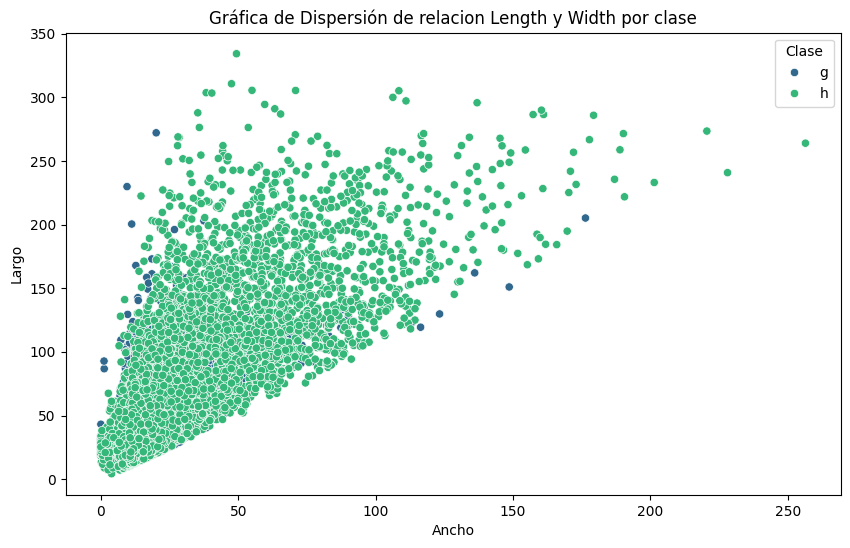

In [ ]:
datos['class'] = datos['class'].astype('category')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos, x='fWidth', y='fLength', hue='class', palette='viridis')
plt.title('Gráfica de Dispersión de relacion Length y Width por clase')
plt.xlabel('Ancho')
plt.ylabel('Largo')
plt.legend(title='Clase')
plt.show()

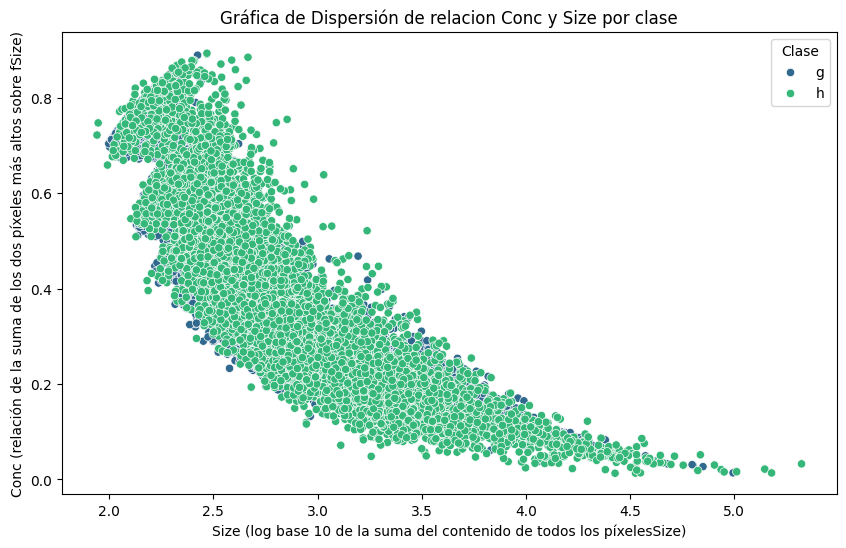

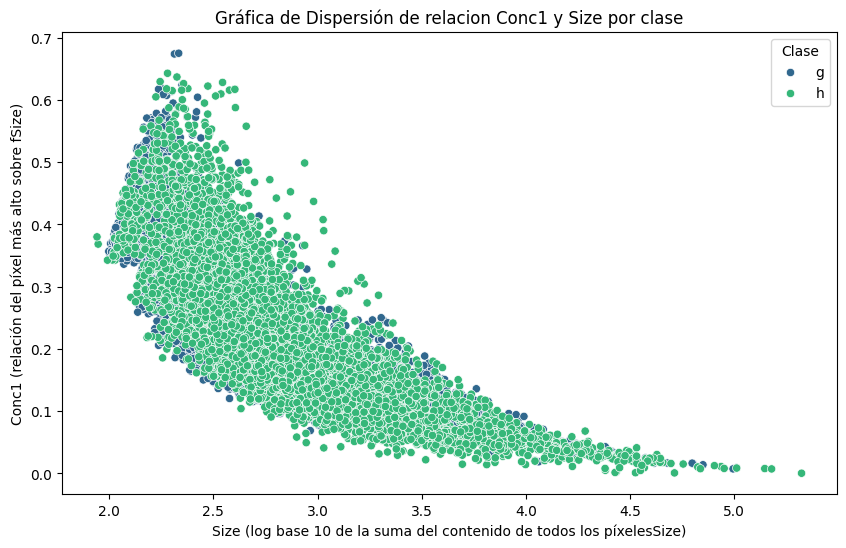

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos, x='fSize', y='fConc', hue='class', palette='viridis')
plt.title('Gráfica de Dispersión de relacion Conc y Size por clase')
plt.xlabel('Size (log base 10 de la suma del contenido de todos los píxelesSize)')
plt.ylabel('Conc (relación de la suma de los dos píxeles más altos sobre fSize)')
plt.legend(title='Clase')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos, x='fSize', y='fConc1', hue='class', palette='viridis')
plt.title('Gráfica de Dispersión de relacion Conc1 y Size por clase')
plt.xlabel('Size (log base 10 de la suma del contenido de todos los píxelesSize)')
plt.ylabel('Conc1 (relación del píxel más alto sobre fSize)')
plt.legend(title='Clase')
plt.show()

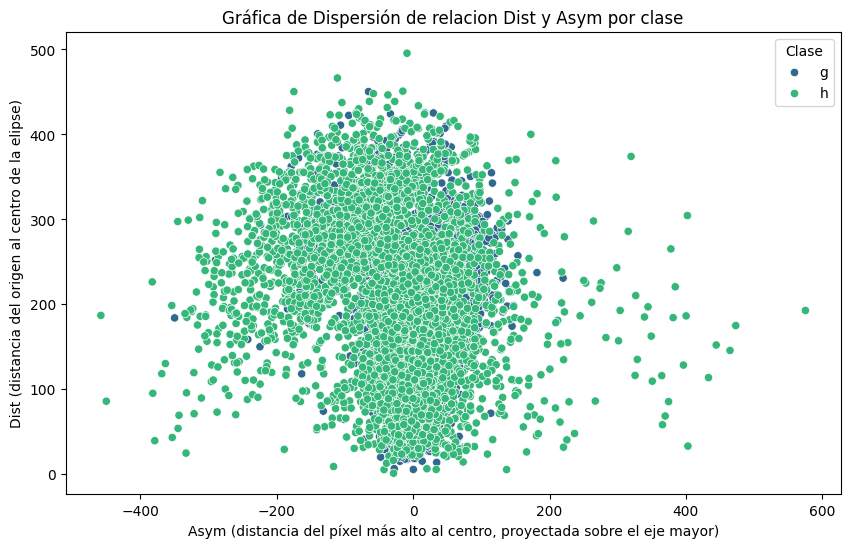

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos, x='fAsym', y='fDist', hue='class', palette='viridis')
plt.title('Gráfica de Dispersión de relacion Dist y Asym por clase')
plt.xlabel('Asym (distancia del píxel más alto al centro, proyectada sobre el eje mayor)')
plt.ylabel('Dist (distancia del origen al centro de la elipse)')
plt.legend(title='Clase')
plt.show()

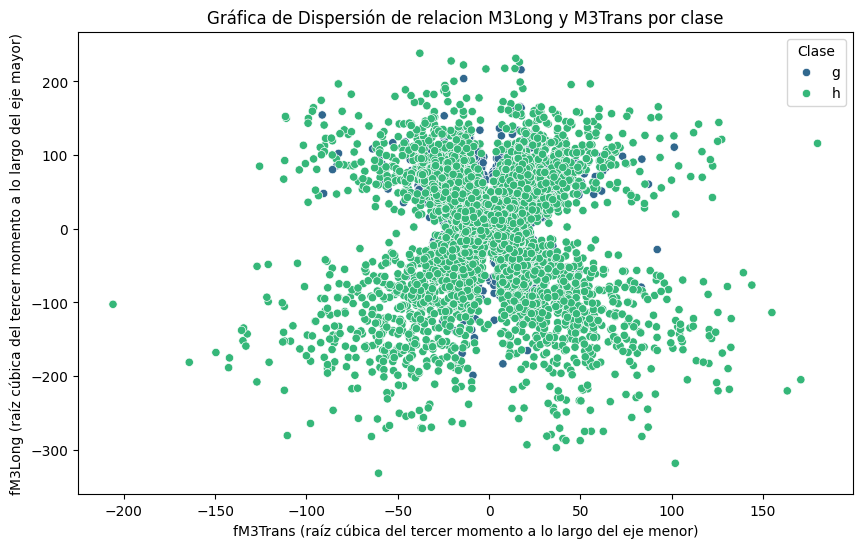

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos, x='fM3Trans', y='fM3Long', hue='class', palette='viridis')
plt.title('Gráfica de Dispersión de relacion M3Long y M3Trans por clase')
plt.xlabel('fM3Trans (raíz cúbica del tercer momento a lo largo del eje menor)')
plt.ylabel('fM3Long (raíz cúbica del tercer momento a lo largo del eje mayor)')
plt.legend(title='Clase')
plt.show()

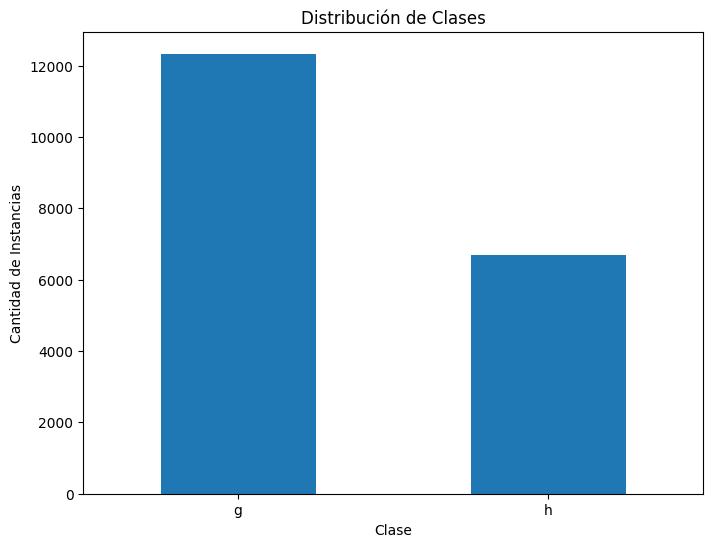

In [ ]:
class_counts = datos['class'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Instancias')
plt.xticks(rotation=0)
plt.show()

In [ ]:
total_registros = datos.shape[0]
class_counts = datos['class'].value_counts()
class_porcentj = (class_counts / total_registros) * 100

print(f"Número total de registros: {total_registros}")
print("Número de registros para cada clase:")
print(class_counts)

print("Porcentaje de registros para cada clase:")
print(class_porcentj)

Número total de registros: 19020
Número de registros para cada clase:
class
g    12332
h     6688
Name: count, dtype: int64
Porcentaje de registros para cada clase:
class
g    64.837014
h    35.162986
Name: count, dtype: float64


##Preprocesamiento de datos.

Cambiando la ultima columna para que todos los datos sean continuos.

In [ ]:
datos['class'] = pd.Categorical(datos['class'], categories=['g', 'h', 1, 0])
datos.loc[datos['class'] == 'g', 'class'] = 1
datos.loc[datos['class'] == 'h', 'class'] = 0

datos['class'] = pd.to_numeric(datos['class'])

Comprobar el cambio.

In [ ]:
print("Fila 0:")
print(datos.iloc[0])

print("\nFila 19000:")
print(datos.iloc[19000])

Fila 0:
fLength     28.7967
fWidth      16.0021
fSize        2.6449
fConc        0.3918
fConc1       0.1982
fAsym       27.7004
fM3Long     22.0110
fM3Trans    -8.2027
fAlpha      40.0920
fDist       81.8828
class        1.0000
Name: 0, dtype: float64

Fila 19000:
fLength      69.3556
fWidth       31.9822
fSize         3.2231
fConc         0.3093
fConc1        0.1744
fAsym       -52.6569
fM3Long     -42.0622
fM3Trans      6.3984
fAlpha        7.6304
fDist       289.2860
class         0.0000
Name: 19000, dtype: float64


In [ ]:
clase_positiva_idxs = datos[datos["class"] == 1].index.tolist()
clase_negativa_idxs = datos[datos["class"] == 0].index.tolist()

clase_negativa_submuestreada_idxs = np.random.choice(clase_negativa_idxs, size=len(clase_positiva_idxs), replace=True)

indices_submuestreados = np.concatenate([clase_positiva_idxs, clase_negativa_submuestreada_idxs])
datos_submuestreados = datos.iloc[indices_submuestreados, :]

print(f"Clase positiva (Fraude): {len(clase_positiva_idxs)}, Clase negativa (No fraude): {len(clase_negativa_submuestreada_idxs)}")
datos_submuestreados.head()

Clase positiva (Fraude): 12332, Clase negativa (No fraude): 12332


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


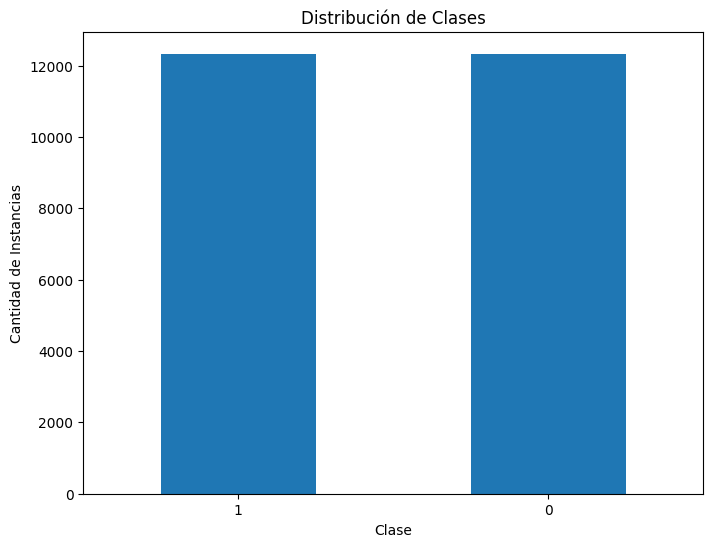

In [ ]:
class_counts = datos_submuestreados['class'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Instancias')
plt.xticks(rotation=0)
plt.show()

In [ ]:
total_registros = datos_submuestreados.shape[0]
class_counts = datos_submuestreados['class'].value_counts()
class_porcentj = (class_counts / total_registros) * 100

print(f"Número total de registros: {total_registros}")
print("Número de registros para cada clase:")
print(class_counts)

print("Porcentaje de registros para cada clase:")
print(class_porcentj)

Número total de registros: 24664
Número de registros para cada clase:
class
1    12332
0    12332
Name: count, dtype: int64
Porcentaje de registros para cada clase:
class
1    50.0
0    50.0
Name: count, dtype: float64


##Dividir el conjunto de datos.

Separacion de los datos en clases para entrenamiento y test.

In [ ]:
basededatossincambios = datos_submuestreados.drop('class', axis=1)
targetsincambios = datos_submuestreados['class']

x_trainSC, x_testSC, y_trainSC, y_testSC = train_test_split(basededatossincambios, targetsincambios, train_size=0.8, random_state=1001)

print("Conjunto de datos para entrenamiento: ", len(x_trainSC))
print("Conjunto de target para entrenamiento:",len(x_testSC))
print("Conjunto de datos para test:",len(y_trainSC))
print("Conjunto de target para test:",len(y_testSC))

Conjunto de datos para entrenamiento:  19731
Conjunto de target para entrenamiento: 4933
Conjunto de datos para test: 19731
Conjunto de target para test: 4933


##Entrenar los modelos.

In [ ]:
lrsc = LogisticRegression(penalty=None, max_iter=1000)
lrsc.fit(x_trainSC,y_trainSC)
print(f"Training score: {lrsc.score(x_trainSC,y_trainSC)}")
print(f"Test score: {lrsc.score(x_testSC,y_testSC)}")

Training score: 0.7738583954183772
Test score: 0.7719440502736672


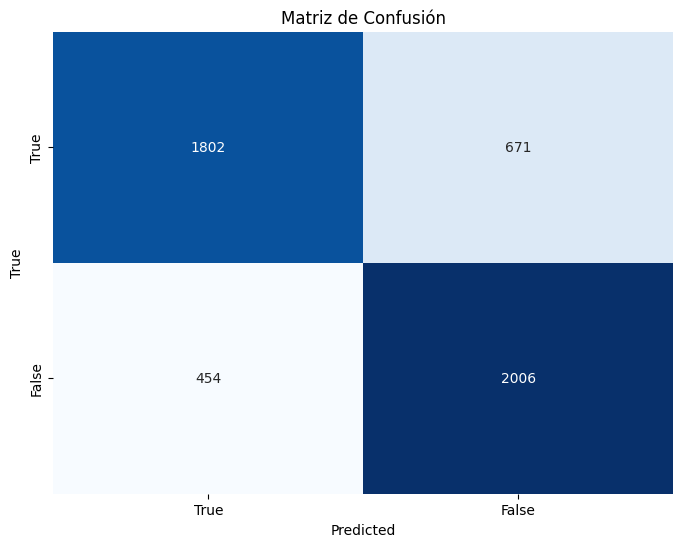

In [ ]:
y_pred = lrsc.predict(x_testSC)
cm = confusion_matrix(y_testSC, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()

Normalizar los datos

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_trainSC)
X_test = scaler.transform(x_testSC)

Usar una maquina de soporte vectorial (SVM)

In [ ]:
classifier = SVC(C=1000, kernel='rbf', random_state=0, gamma='scale')
classifier.fit(X_train, y_trainSC)

train_score = classifier.score(X_train, y_trainSC)
test_score = classifier.score(X_test, y_testSC)
print("Training score:", train_score)
print("Test score:", test_score)

Training score: 0.9063909583903502
Test score: 0.8716805189539834


- linear: 0.71
- poly: 0.83
- rbf: 0.90

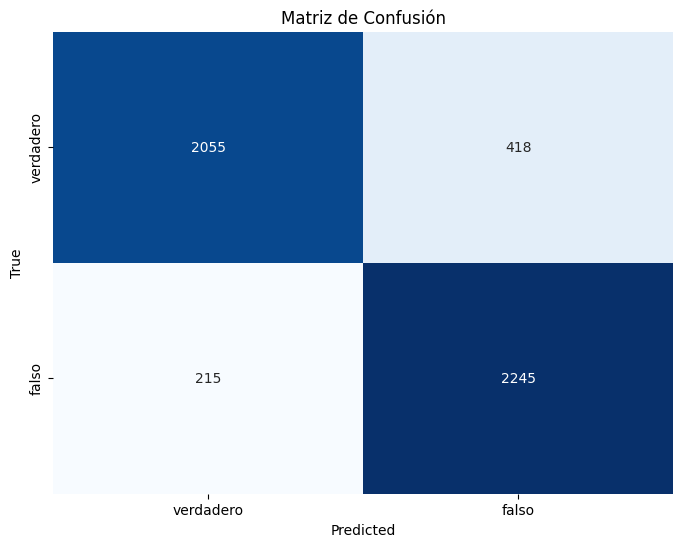

In [ ]:
y_pred = classifier.predict(X_test)
CM = confusion_matrix(y_testSC, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['verdadero', 'falso'], yticklabels=['verdadero', 'falso'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()

##Prediccion del conjunto.

In [ ]:
nueva_muestra = np.array([[28.6, 16.1, 2.5, 0.5, 0.3, 0.2, 27.5, 22.1, -8.0, 45.0]])
nueva_muestra_escalada = scaler.transform(nueva_muestra)
prediccion = classifier.predict(nueva_muestra_escalada)

print("Predicción de la nueva muestra:", prediccion, )
print("Es un hadron" if prediccion == 0 else "Es una particula gama")

Predicción de la nueva muestra: [1]
Es una particula gama


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


##Precision.

In [ ]:
acc = round((CM[1,1]+CM[0,0])/(CM[0,0] + CM[0,1] + CM[1,0] + CM[1,1])*100,3)
rec = round(CM[1,1]/(CM[1,0] + CM[1,1])*100,3)

print(f"Accuracy: {acc}")
print(f"Recall: {rec}")

prc = round((CM[1,1])/(CM[1,1] + CM[0,1]))
f1_score = 2*((prc * rec)/(prc + rec))

print(f"precision: {prc}")
print(f"f1_score:", f1_score)

Accuracy: 87.168
Recall: 91.26
precision: 1
f1_score: 1.9783221331021028


#Codigo de Regresion.

##Imports

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

##Datos:

Cemento (componente 1) -- cuantitativo -- kg en una mezcla de m3 -- Variable de entrada


Escoria de alto horno (componente 2) -- cuantitativo -- kg en una mezcla de m3 -- Variable de entrada


Ceniza volante (componente 3) -- cuantitativo -- kg en una mezcla de m3 -- Variable de entrada


Agua (componente 4) -- cuantitativo -- kg en una mezcla de m3 -- Variable de entrada


Superplastificante (componente 5) -- cuantitativo -- kg en una mezcla de m3 -- Variable de entrada


Árido grueso (componente 6) -- cuantitativo -- kg en una mezcla de m3 -- Variable de entrada


Árido fino (componente 7) -- cuantitativo -- kg en una mezcla de m3 -- Variable de entrada


Edad -- cuantitativo -- Día (1~365) -- Variable de entrada


Resistencia a la compresión del concreto -- cuantitativo -- MPa -- Variable de salida

In [ ]:
datos_concreto = pd.read_excel('/content/Concrete_Data.xls', skiprows=1)

columnas = [
    'Cement',
    'Blast Furnace Slag',
    'Fly Ash',
    'Water',
    'Superplasticizer',
    'Coarse Aggregate',
    'Fine Aggregate',
    'Age',
    'Concrete compressive strength(MPa)'
]
datos_concreto.columns = columnas

datos_concreto.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength(MPa)
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,280.914091,73.967298,54.239796,181.585374,6.206710,972.853401,773.673712,45.679300,35.774912
std,104.245542,86.290255,64.005258,21.357226,5.975279,77.763459,80.156602,63.198226,16.656880
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,732.600000,7.000000,23.696601
50%,272.800000,22.000000,0.000000,185.000000,6.350000,968.000000,779.700000,28.000000,34.397958
75%,350.000000,143.000000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,45.939786
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


##Visualizacion de los datos.

In [ ]:
#print(datos_concreto.iloc[[0]])

num_filas, num_columnas = datos_concreto.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 1029
Número de columnas: 9


In [ ]:
datos_faltantes = datos_concreto.isnull().sum()

if datos_faltantes.sum() > 0:
    print("Columnas con datos faltantes:")
    print(datos_faltantes[datos_faltantes > 0])
else:
    print("No hay datos faltantes en el DataFrame.")

No hay datos faltantes en el DataFrame.


In [ ]:
tipos_de_datos = datos_concreto.dtypes

print("Tipos de datos:")
print(tipos_de_datos)

Tipos de datos:
Cement                                float64
Blast Furnace Slag                    float64
Fly Ash                               float64
Water                                 float64
Superplasticizer                      float64
Coarse Aggregate                      float64
Fine Aggregate                        float64
Age                                     int64
Concrete compressive strength(MPa)    float64
dtype: object


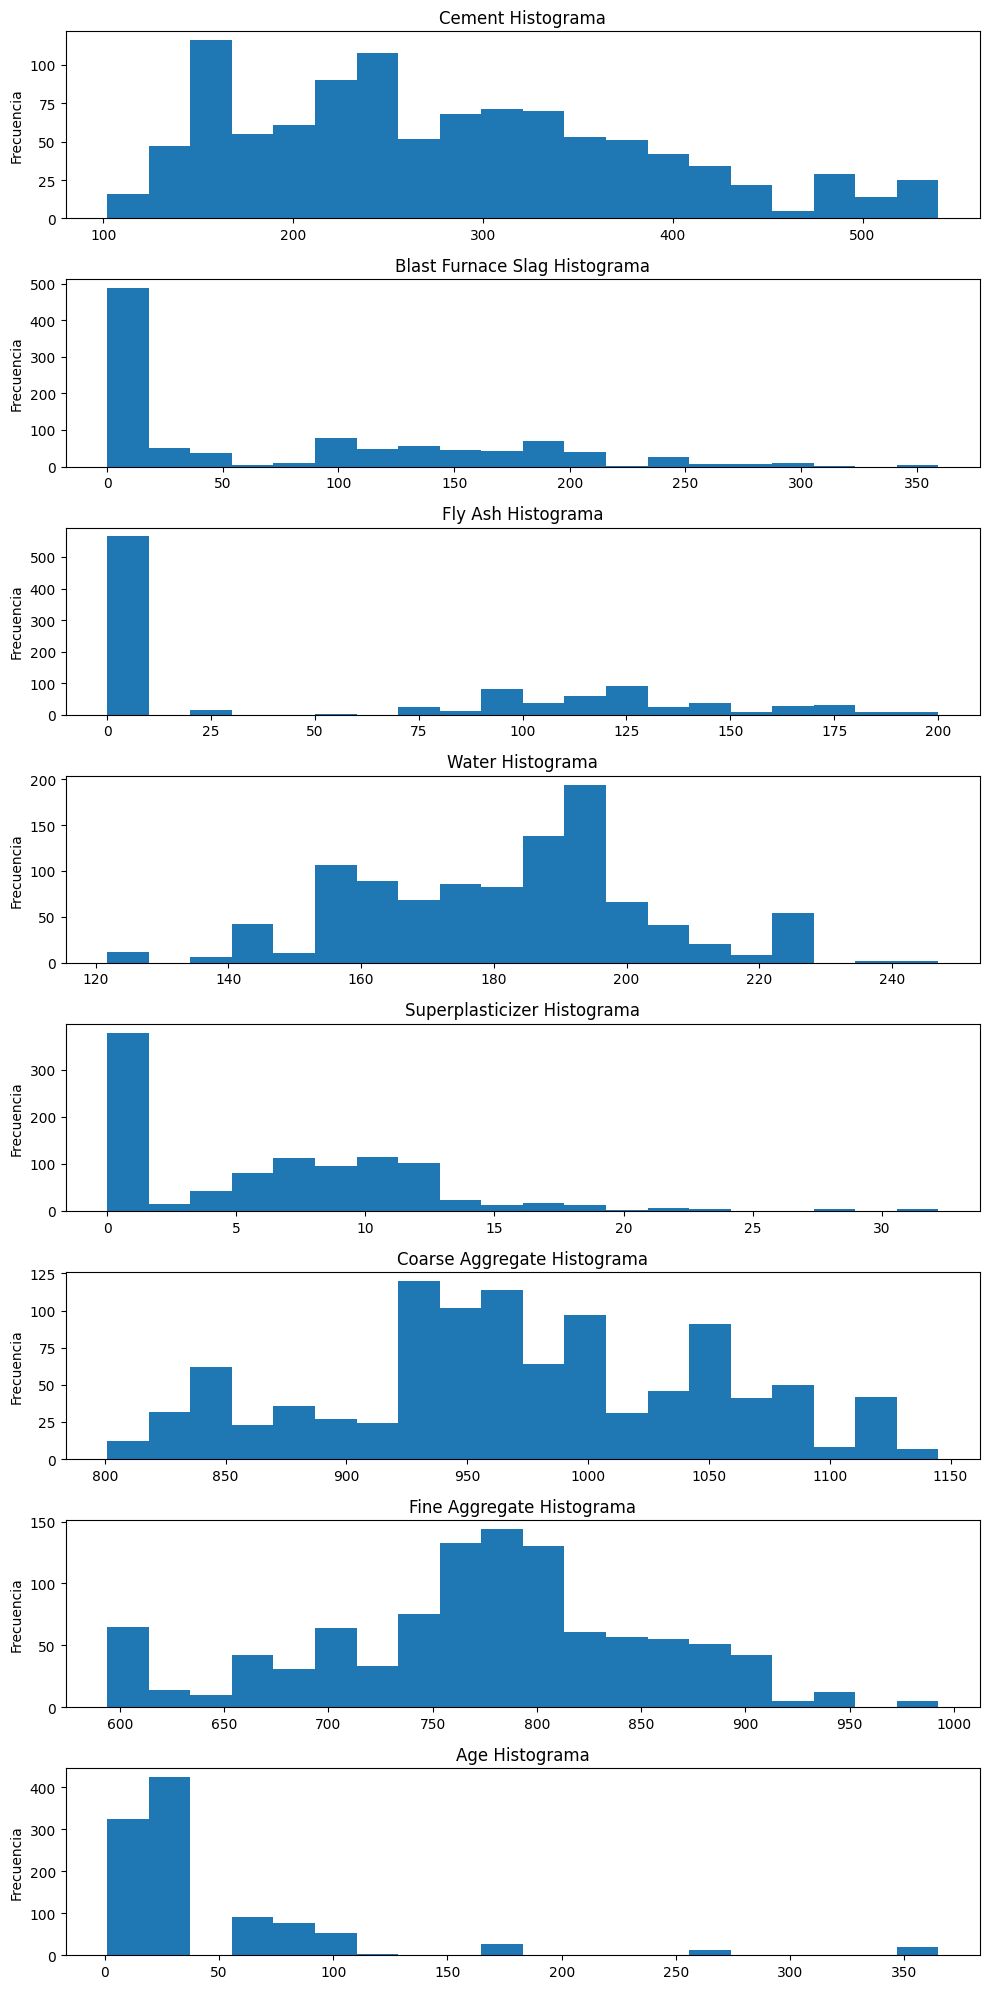

In [ ]:
columnas_sin_compressive_strength = [
    'Cement',
    'Blast Furnace Slag',
    'Fly Ash',
    'Water',
    'Superplasticizer',
    'Coarse Aggregate',
    'Fine Aggregate',
    'Age'
]


fig, axs = plt.subplots(nrows=len(columnas_sin_compressive_strength), figsize=(10, 20))

for i, columna in enumerate(columnas_sin_compressive_strength):
    datos_concreto[columna].plot(kind='hist', ax=axs[i], title=columna + " Histograma", bins=20)
    axs[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


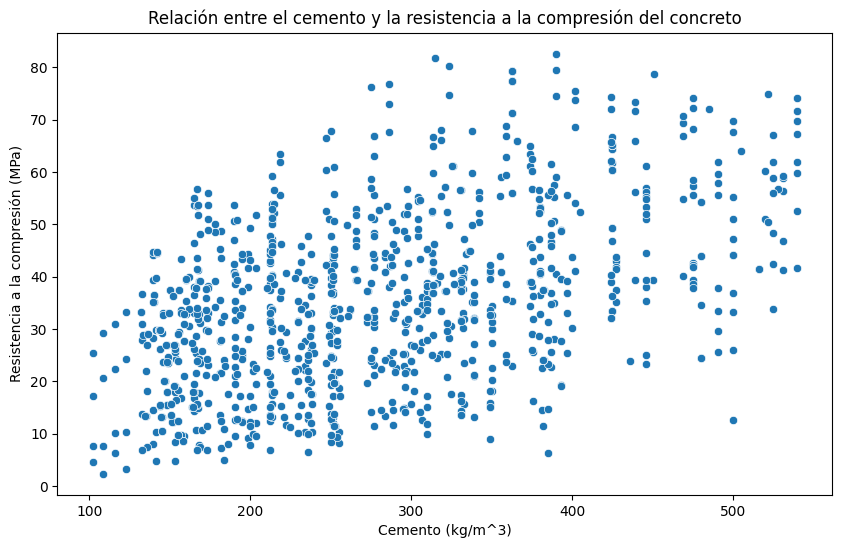

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cement', y='Concrete compressive strength(MPa)', data=datos_concreto)
plt.title('Relación entre el cemento y la resistencia a la compresión del concreto')
plt.xlabel('Cemento (kg/m^3)')
plt.ylabel('Resistencia a la compresión (MPa)')
plt.show()


##Division de los datos

In [ ]:
datos_concreto.columns = columnas

X = datos_concreto.drop('Concrete compressive strength(MPa)', axis=1)
y = datos_concreto['Concrete compressive strength(MPa)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Conjunto de datos para entrenamiento: ", len(X_train))
print("Conjunto de target para entrenamiento:",len(X_test))
print("Conjunto de datos para test:",len(y_train))
print("Conjunto de target para test:",len(y_test))

Conjunto de datos para entrenamiento:  823
Conjunto de target para entrenamiento: 206
Conjunto de datos para test: 823
Conjunto de target para test: 206


##Entrenamiento

In [ ]:
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred_train = poly_model.predict(X_train_poly)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

y_pred_test = poly_model.predict(X_test_poly)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Desempeño del modelo en el conjunto de entrenamiento:")
print("MSE: {:.2f}".format(mse_train))
print("R²: {:.2f}".format(r2_train))

print("\nDesempeño del modelo en el conjunto de prueba:")
print("MSE: {:.2f}".format(mse_test))
print("R²: {:.2f}".format(r2_test))

Desempeño del modelo en el conjunto de entrenamiento:
MSE: 19.47
R²: 0.93

Desempeño del modelo en el conjunto de prueba:
MSE: 37.62
R²: 0.85


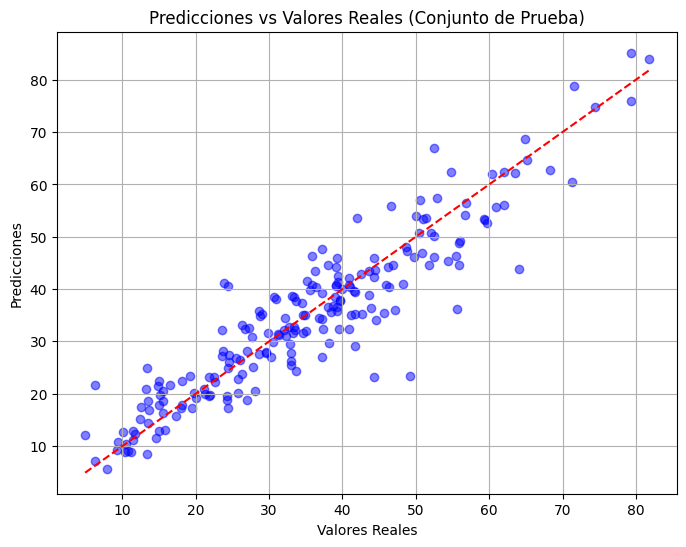

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales (Conjunto de Prueba)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

##Prediccion

In [ ]:
new_data = np.array([[266.0, 114.0, 0.0, 228.0, 0.0, 932.0, 670.0, 90]])
new_data_poly = poly_features.transform(new_data)
prediction = poly_model.predict(new_data_poly)

print("\nPredicción de resistencia a la compresión del concreto:")
print("Predicción: {:.2f} MPa".format(prediction[0]))

new_data = np.array([[139.6, 209.4, 0.0, 192.0, 0.0, 1047.0, 806.9, 3]])
new_data_poly = poly_features.transform(new_data)
prediction = poly_model.predict(new_data_poly)

print("\nPredicción de resistencia a la compresión del concreto:")
print("Predicción: {:.2f} MPa".format(prediction[0]))


Predicción de resistencia a la compresión del concreto:
Predicción: 48.58 MPa

Predicción de resistencia a la compresión del concreto:
Predicción: 9.07 MPa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


##Maquina de soporte vectorial

MSE: 98.89666802711172
R²: 0.6178810021172686


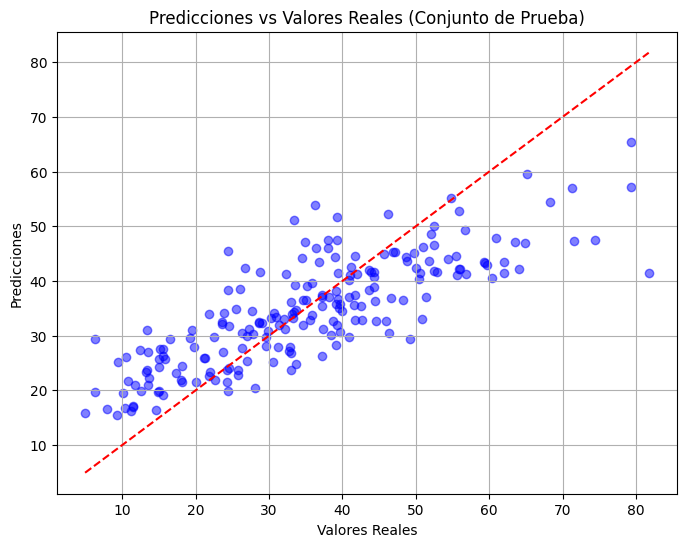

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

datos_concreto = pd.read_excel('/content/Concrete_Data.xls', skiprows=1)
columnas = [
    'Cement',
    'Blast Furnace Slag',
    'Fly Ash',
    'Water',
    'Superplasticizer',
    'Coarse Aggregate',
    'Fine Aggregate',
    'Age',
    'Concrete compressive strength(MPa)'
]
datos_concreto.columns = columnas

X = datos_concreto.drop('Concrete compressive strength(MPa)', axis=1)
y = datos_concreto['Concrete compressive strength(MPa)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(X_train_scaled, y_train)

y_pred = svm_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R²:", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales (Conjunto de Prueba)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5, 1],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'C': 100, 'epsilon': 1, 'gamma': 'auto'}


In [ ]:
svm_regressor_tuned = SVR(kernel='rbf', C=best_params['C'], epsilon=best_params['epsilon'], gamma=best_params['gamma'])
svm_regressor_tuned.fit(X_train_scaled, y_train)

y_pred_tuned = svm_regressor_tuned.predict(X_test_scaled)

mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print("MSE ajustado:", mse_tuned)
print("R² ajustado:", r2_tuned)

MSE ajustado: 34.41325938664445
R² ajustado: 0.8670333343576537


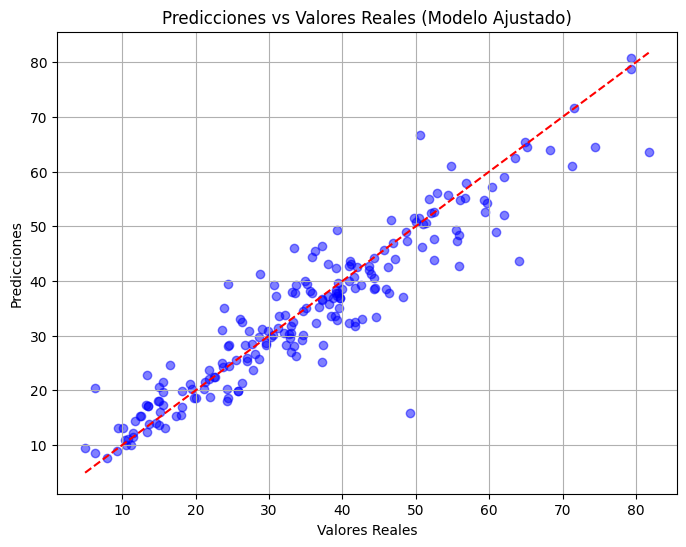

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tuned, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales (Modelo Ajustado)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

#Additional information.

Sobre la base de datos Magic:


The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68


Recursos:
  - https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope
  -https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength



Name:
Kevin Dario Escobar Botello.

Teacher:
Dr. Lorena Díaz González